SPEECH PROCESSING ASSIGNMENT 2

NAME: VIVEK KUMAR BHARATI

ROLL NO: 22M1081 


In [1]:
%matplotlib inline 
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write
import scipy.io.wavfile as wav
from __future__ import division
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict

### Question 1 and 2: 
Apply pre-emphasis to the signal and compute and plot the narrowband magnitude spectrum using a Hamming window of duration = 30 ms on a segment near the centre of the given audio file.

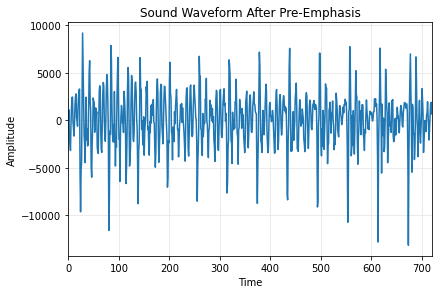

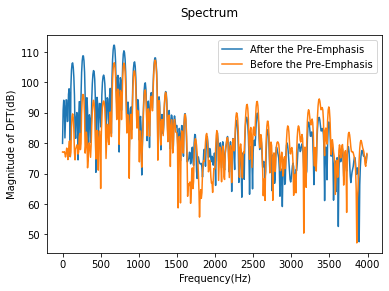

In [2]:
# Reading the wave file
Fs, signal_ = wav.read('aa.wav');

def hamming_window(sound,duration=30,center=True):
    
    window_duration = int((duration/1000)*Fs)
    if center:
        center = len(sound)//2
        windowed_sound = sound[center-window_duration//2:center+window_duration//2]
        xticks = np.linspace(center-window_duration//2,center+window_duration//2,window_duration)
    else:
        windowed_sound = sound[:window_duration]

    hamming_output = np.hamming(window_duration)*windowed_sound
    return hamming_output

def preEmphasis(x, plot=False):
    alpha = 0.95
    y = np.zeros(len(x))
    for i in range(1, len(x)):
        y[i] = x[i] - alpha*x[i-1]
    if plot:
        plt.figure()
        plt.title("Sound Waveform After Pre-Emphasis")
        plt.plot(y)
        plt.grid(color='0.9', linestyle='-')
        plt.tight_layout()
        plt.xlim(xmin=0)
        plt.ylabel("Amplitude")
        plt.xlabel("Time")
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.savefig("plots/PreEmphasizedSound.png",bbox_inches="tight")
    return y

# windowLen = (Duration/1000)

def NarrowBandSpectrum(x, Fs, windowLen):
    center = len(x)//2
    window_duration = int(windowLen*Fs)
    windowed_sound = x[center-window_duration//2:center+window_duration//2]

    
    fourierTransform = np.fft.fft(windowed_sound, 1024);
    frequency = np.fft.fftfreq(fourierTransform.shape[-1], 1/float(Fs))
    
    return fourierTransform, frequency
    
preEmphasized = preEmphasis(signal_, plot=True);
h_w = hamming_window(preEmphasized)
#before pre-emphasis, the Narrow band spectrum
preEmphasizedSpectrum, frequency1 = NarrowBandSpectrum(signal_, Fs, .03);

#after pre-emphasis, the Wide band spectrum
Spectrum, frequency2 = NarrowBandSpectrum(preEmphasized, Fs, .03);

fig = plt.figure()
plt.plot(frequency1[:int(len(frequency1)//2)], 20*np.log10(np.abs(preEmphasizedSpectrum[:len(preEmphasizedSpectrum)//2])))
plt.plot(frequency2[:int(len(frequency2)//2)], 20*np.log10(np.abs(Spectrum[:len(Spectrum)//2])))
fig.suptitle('Spectrum')
plt.ylabel('Magnitude of DFT(dB)')
plt.xlabel('Frequency(Hz)')
plt.legend(['After the Pre-Emphasis', 'Before the Pre-Emphasis'])
plt.savefig("plots/NarrowBandSpectra.png",bbox_inches="tight")
plt.show()

### Question 3
With the same 30 ms segment of part 2, compute the autocorrelation coefficients required for LPC calculation at various p = 2,4,6,8,10. Use the Levinson-Durbin recursion to compute the LP coefficients from the autocorrelation coefficients. Plot error signal energy (i.e. square of gain) vs p.


LP coefficients for order 2 are
[ 1.          0.96454776 -0.51474629  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]

LP coefficients for order 4 are
[ 1.          0.68322148 -0.13507646 -0.28905557 -0.16557719  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]

LP coefficients for order 6 are
[ 1.          0.73630801 -0.14236591 -0.31958052 -0.28524925  0.28348265
 -0.18881888  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]

LP coefficients for order 8 are
[ 1.          0.5881573  -0.11510746 -0.22581153 -0.54813899  0.03861646
 -0.09802675  0.21389618 -0.58065459  0.          0.          0.
  0.          0.       

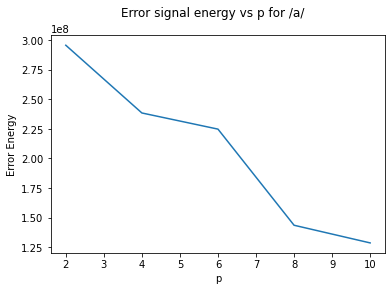

In [3]:
def LPanalysis(signal, p, windowLen): 
    
    duration = signal.shape[-1]
    window = signal[(duration-int((windowLength)*Fs))//2:(duration+int((windowLength)*Fs))//2]*np.hamming(windowLength*Fs);

    #Here p = LP order
    R = np.correlate(window,window, mode = 'same')
    R = R[len(R)//2:] 
    #Calculating R = np.correlate(window, window, mode='full')
    #Calculating R = R[-len(window):]
    #Applying Levinson Algorithm
    E = np.zeros(p+1) 
    a = np.zeros((p+1,p+1))
    G = np.zeros(p+1)
    
    E[0] = R[0]     
    for i in range(1, p+1): # 1 <= i <= p
        if i==1:
            k = R[1]/E[0]
            a[1][1] = k
            E[1] = (1-k**2)*E[0]
            a[1][0] = 1
            G[1] = np.sqrt(E[1])
        else:
        
            temp = 0
            for j in range(1, i):
                temp += a[i-1][j] * R[i-j]

            k = (R[i] - temp)/E[i-1]
            a[i][i] = k
            
            for j in range(1, i):
                a[i][j] = a[i-1][j] - k * a[i-1][i-j]

            E[i] = (1 - k**2) * E[i-1]
            
            G[i] = np.sqrt(E[i])
            a[i][0] = 1

    return (E, G, a)

#LP Analysis
windowLength = 0.03;
E, G, a = LPanalysis(preEmphasized, 20, windowLength);

P = [2, 4, 6, 8, 10]

for p in P:
    print("\nLP coefficients for order",p, "are");
    print(a[p]);
    

# Plotting The Error Signal Energy
fig = plt.figure()
plt.plot(P,G[P]*G[P])
fig.suptitle('Error signal energy vs p for /a/')
plt.ylabel('Error Energy')
plt.xlabel('p')
plt.savefig("plots/ErrorEnergy.png",bbox_inches="tight")
plt.show()


### Question 4:
Show the pole-zero plots of the estimated all-pole filter for p=6,10; comment.


ValueError: Format '51376466j]' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

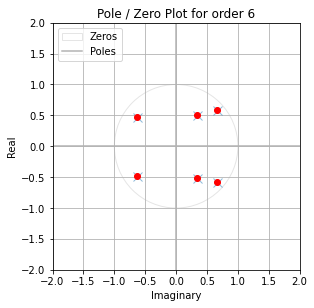

In [7]:
def zplane(z, p, filename=None): # Referenced from https://gist.github.com/endolith/4625838
    """Plot the complex z-plane given zeros and poles.
    """
    
    # get a figure/plot
    ax = plt.subplot(2, 2, 1)
    # TODO: should just inherit whatever subplot it's called in?

    # Add unit circle and zero axes    
    unit_circle = patches.Circle((0,0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.7')
    axhline(0, color='0.7')
    
    # Plot the poles and set marker properties
    poles = plt.plot(p.real, p.imag, 'x', markersize=9, alpha=0.5)
    
    # Plot the zeros and set marker properties
    zeros = plt.plot(z.real, z.imag,  'o', markersize=9, 
             color='none', alpha=0.5,
             markeredgecolor=poles[0].get_color(), # same color as poles
             )

    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(z), abs(p), [1])))
    plt.axis('scaled')
    plt.axis([-r, r, -r, r])
#    ticks = [-1, -.5, .5, 1]
#    plt.xticks(ticks)
#    plt.yticks(ticks)

    """
    If there are multiple poles or zeros at the same point, put a 
    superscript next to them.
    TODO: can this be made to self-update when zoomed?
    """
    # Finding duplicates by same pixel coordinates (hacky for now):
    poles_xy = ax.transData.transform(np.vstack(poles[0].get_data()).T)
    zeros_xy = ax.transData.transform(np.vstack(zeros[0].get_data()).T)    

    # dict keys should be ints for matching, but coords should be floats for 
    # keeping location of text accurate while zooming

    # TODO make less hacky, reduce duplication of code
    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in poles_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y, 
                        r' ${}^{' + str(value) + '}$',
                        fontsize=13,
                        )

    d = defaultdict(int)
    coords = defaultdict(tuple)
    for xy in zeros_xy:
        key = tuple(np.rint(xy).astype('int'))
        d[key] += 1
        coords[key] = xy
    for key, value in d.items():
        if value > 1:
            x, y = ax.transData.inverted().transform(coords[key])
            plt.text(x, y, 
                        r' ${}^{' + str(value) + '}$',
                        fontsize=13,
                        )
def poleZeroPlot(b,a_):
    a_[1:len(a_)] = -a_[1:len(a_)];
    b=[b]
    z, p, k = signal.tf2zpk(b, a_)
    p = p[p!=0]
    fig = plt.figure(figsize=(10, 10))
    zplane(z, p)
    plt.plot(np.real(z), np.imag(z), 'xb')
    plt.plot(np.real(p), np.imag(p), 'or')
    plt.ylim((-2.0, 2.0))
    plt.xlim((-2.0,2.0))
    plt.legend(['Zeros', 'Poles'], loc=2)
    plt.title('Pole / Zero Plot for order '+str(len(p)))
    plt.ylabel('Real')
    plt.xlabel('Imaginary')
    plt.grid("both")
    plt.savefig("plots/polezero{}".format(p),bbox_inches="tight")
# Pole-zero plot
windowLength = 0.03;
E, G, a = LPanalysis(preEmphasized, 20, windowLength);
poleZeroPlot(G[6], a[6])
poleZeroPlot(G[10], a[10])

### Comments:
1) As one formant gives two conjugate poles so a better indication of number of formant frequencies is the Pole Zero plot. This is derived from z = r$e^{j\theta}$ where $\theta$ = $2\pi FT_{s}$ and r = $e^{-\pi BT_{s}}$ 

2) We get 6 poles for order p = 6 therefore 3 formant frequencies. These poles have more bandwidth spread due to less pole magnitude. 

3) We get 10 poles for order p = 10 therefore 5 formant frequencies. Since more number of frequencies are estimated, most of the poles are closely coinciding with the unit circle and this indicates the bandwidths corresponding to the poles of the filter $G/A(z)$ are correctly estimated.



### Question 5:
Compute the gain and plot the LPC spectrum magnitude (i.e. the dB magnitude frequency response of the estimated all-pole filter) for each order "p". Comment on the characteristics of the spectral envelope estimates. Comment on their shapes with reference to the short-time magnitude spectrum computed in part 2.

Gain for order p = 2 is: 17197.01933468938
Gain for order p = 4 is: 15441.685808387725
Gain for order p = 6 is: 14992.827833089372
Gain for order p = 8 is: 11978.029883784573
Gain for order p = 10 is: 11337.057128692231


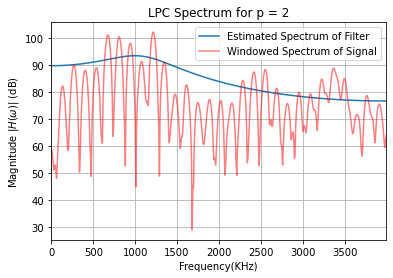

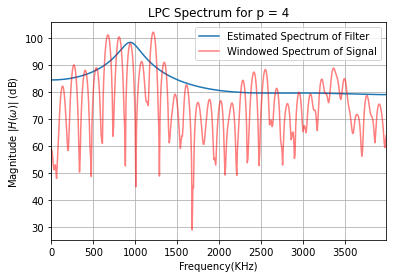

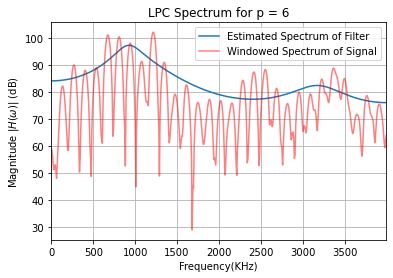

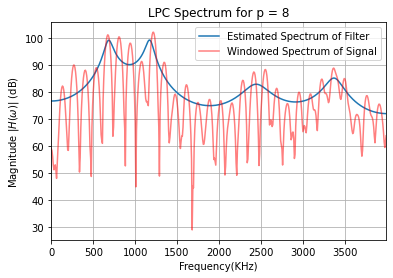

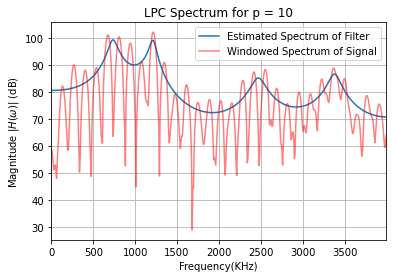

In [6]:
def plot_LPC_Spectrum(G, Fs, h_w, preEmphasized):
    windowLength = 0.03;
    E, G, a = LPanalysis(preEmphasized, 20, windowLength);
    p=[2,4,6,8,10]
    n = len(p)
    for i in range(n):
        poles = [a[p[i]][0],*(-a[p[i]][1:p[i]+1])]
        print("Gain for order p =", p[i], "is:", G[p[i]])
        w,h = signal.freqz(G[p[i]],poles)
        w_ham,h_ham = signal.freqz(h_w)
        plt.figure()
        plt.plot((Fs*w/(2*np.pi)),20*np.log10(abs(h)),label="Estimated Spectrum of Filter")
        plt.plot((Fs*w_ham/(2*np.pi)),20*np.log10(abs(h_ham)),"r",alpha=0.5,label="Windowed Spectrum of Signal")
        plt.title("LPC Spectrum for p = {}".format(p[i]))
        plt.grid()
        plt.xlim(xmin=-5)
        plt.legend(loc="best")
        plt.xlabel("Frequency(KHz)")
        plt.ylabel(r"Magnitude $|H(\omega)|$ (dB)")
        plt.autoscale(enable=True, axis='x', tight=True)
        plt.savefig("plots/LPCSpectrum{}.png".format(p[i]),bbox_inches="tight")
        
plot_LPC_Spectrum(G, Fs, h_w, preEmphasized)

### Comments:
1) From above we observ that when p increase, the magnitude spectrum of the estimated filter becomes very close to original signal.

2) From the error signal energy vs p plot it is shown that when order increase, gain decreases.

3) There is 1 formant estimated for p = 2,4 and 2 formant estimated for p = 6 and for p = 8,10 we see 4 fromants estimated


### Question 6:
Based on the 10th-order LP coefficients, carry out the inverse filtering of the /a/ vowel segment to obtain the residual error signal. Can you measure the pitch period of the voiced sound from the residual waveform? Use the acf to detect the pitch. Compare the acf plots of the original speech and residual signals.

Index of the maxima 120
Index of the second maxima 61
Detection of F0 from ACF :  135.59322033898306 Hz


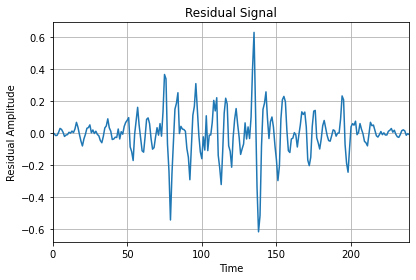

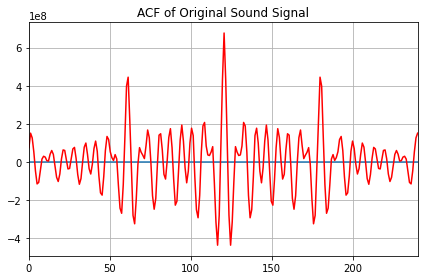

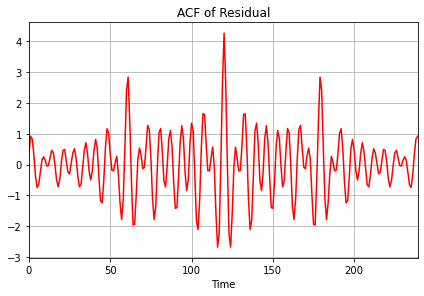

In [5]:
def autocorrelate(gain, poles, segment_signal, duration=30):
    
    window_duration = int((duration/1000)*Fs)

    inverse_filter = np.zeros_like(segment_signal)
    for i in range(segment_signal.shape[0]):
        inverse_filter[i] = segment_signal[i]
        for j in range(len(poles)):
            if (i-j)>=0:
                inverse_filter[i] -= poles[j]*segment_signal[i-j]
        inverse_filter[i] /= gain

    plt.figure()
    plt.plot(inverse_filter)
    plt.title("Residual Signal")
    plt.grid(linestyle='-')
    plt.xlabel("Time")
    plt.ylabel("Residual Amplitude")
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.savefig("plots/ResidualSignal.png",bbox_inches="tight")
    
    autocorrelate = np.correlate(inverse_filter,inverse_filter,mode="same")

    signal_autocorrelate = np.correlate(segment_signal,segment_signal,mode="same")

    maxima = np.argmax(autocorrelate)
    next_maxima = np.argmax(autocorrelate[autocorrelate<0.8*np.max(autocorrelate)])
    
    print("Index of the maxima",maxima)
    print("Index of the second maxima",next_maxima)

    F0 = (Fs/(maxima - next_maxima))
    print("Detection of F0 from ACF : ",F0,"Hz")
    
    center = len(segment_signal)//2
    xticks = np.linspace(center-window_duration//2,center+window_duration//2,window_duration)
    
    plt.figure()
    plt.subplot(111)
    plt.title("ACF of Original Sound Signal")
    
    
    plt.plot(xticks,autocorrelate)
    
    plt.plot(xticks,signal_autocorrelate,"r")
    plt.grid(linestyle='-')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.tight_layout()
    plt.savefig("plots/ACFOriginalSound.png",bbox_inches="tight")
    
    plt.figure()
    plt.plot(autocorrelate, "r")
    plt.grid(linestyle='-')
    plt.xlabel("Time")
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.tight_layout()

    plt.subplot(111)
    plt.title("ACF of Residual")
    plt.savefig("plots/ACFResidual.png",bbox_inches="tight")
    return F0

E, G, a = LPanalysis(preEmphasized, 20, windowLength);
F0 = autocorrelate(G[10], a[10], h_w)

### Comments:
1) We can determine pitch period by calculating distance between peaks on the time scale by using ACF.

2) The fundamental frequency of original signal can be calculated from the residual signal ACF by calculating the time difference between consecutive peaks. Therefore F0 is equal to 135.59 Hz. 

3) Autocorrelation plot of the residual signal is very much resembles the acf of original signal, with lesser magnitude than that of original signal.

4) The calculated pitch period from ACF of error signal and that of actual signal differ only by 2.26 Hz.

5) The plots of original speech and residual signal are similar with respect to each other in the way that they have peaks corresponding to pitch periods at same regular intervals.

6) Both the ACF waveforms decay with time. ACF corresponding to original signal looks less noisy as compared to the ACF of error signal. But both waveforms are useful for accurately predicting the pitch $F_{0}$.